# Data Science and Statisctical Learning

### Author: Bhavya Joshi

### Task 2 - Prediction using Unsupervised ML

In this section we will learn how to deal with an unsupervised dataset. 

In [29]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [30]:
#loading the dataset
df = pd.read_csv('Iris.csv', index_col=0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
#counting the null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [32]:
#visualizing the data
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
              color='species')
fig.show()

In [33]:
# Finding the optimum number of clusters for k-means classification

x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

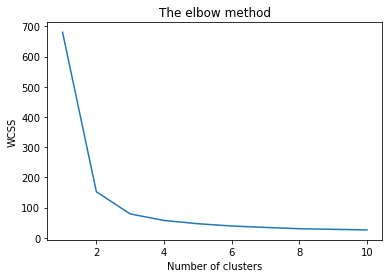

In [34]:
# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

'The elbow method' from the above graph, is the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this graph, we choose the number of clusters as 3

In [35]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [38]:
# Visualising the clusters using plotly
fig1 = px.scatter(df, x = x[y_kmeans == 0, 0], y = x[y_kmeans == 0, 1], color_discrete_sequence=['red'])
fig2 = px.scatter(df, x = x[y_kmeans == 1, 0], y = x[y_kmeans == 1, 1], color_discrete_sequence=['blue'])
fig3 = px.scatter(df, x = x[y_kmeans == 2, 0], y = x[y_kmeans == 2, 1], color_discrete_sequence=['green'])

# Plotting the centroids of the clusters
fig4 = px.scatter(df, kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], color_discrete_sequence=['yellow'])
fig4.update_traces(marker=dict(size=12))
fig5 = go.Figure(data = fig1.data+fig2.data+fig3.data+fig4.data)
fig5.show()